<a href="https://colab.research.google.com/github/aryasulebhavi/deeplearningprojects/blob/main/breast_cancer_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing packages**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


# **load and pre processing the data**

In [2]:
df = sklearn.datasets.load_breast_cancer()

df

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
data = pd.DataFrame(df.data, columns = df.feature_names)

In [4]:
#Adding 'target' column to the DataFrame

data['label'] = df.target

data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
#size of the data

data.shape

(569, 31)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
#checking distribution of target variable

data['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

# 1 - BENIGN

# 0 - MALIGNANT

In [8]:
#Distribution of target variable by mean

data.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


<Axes: >

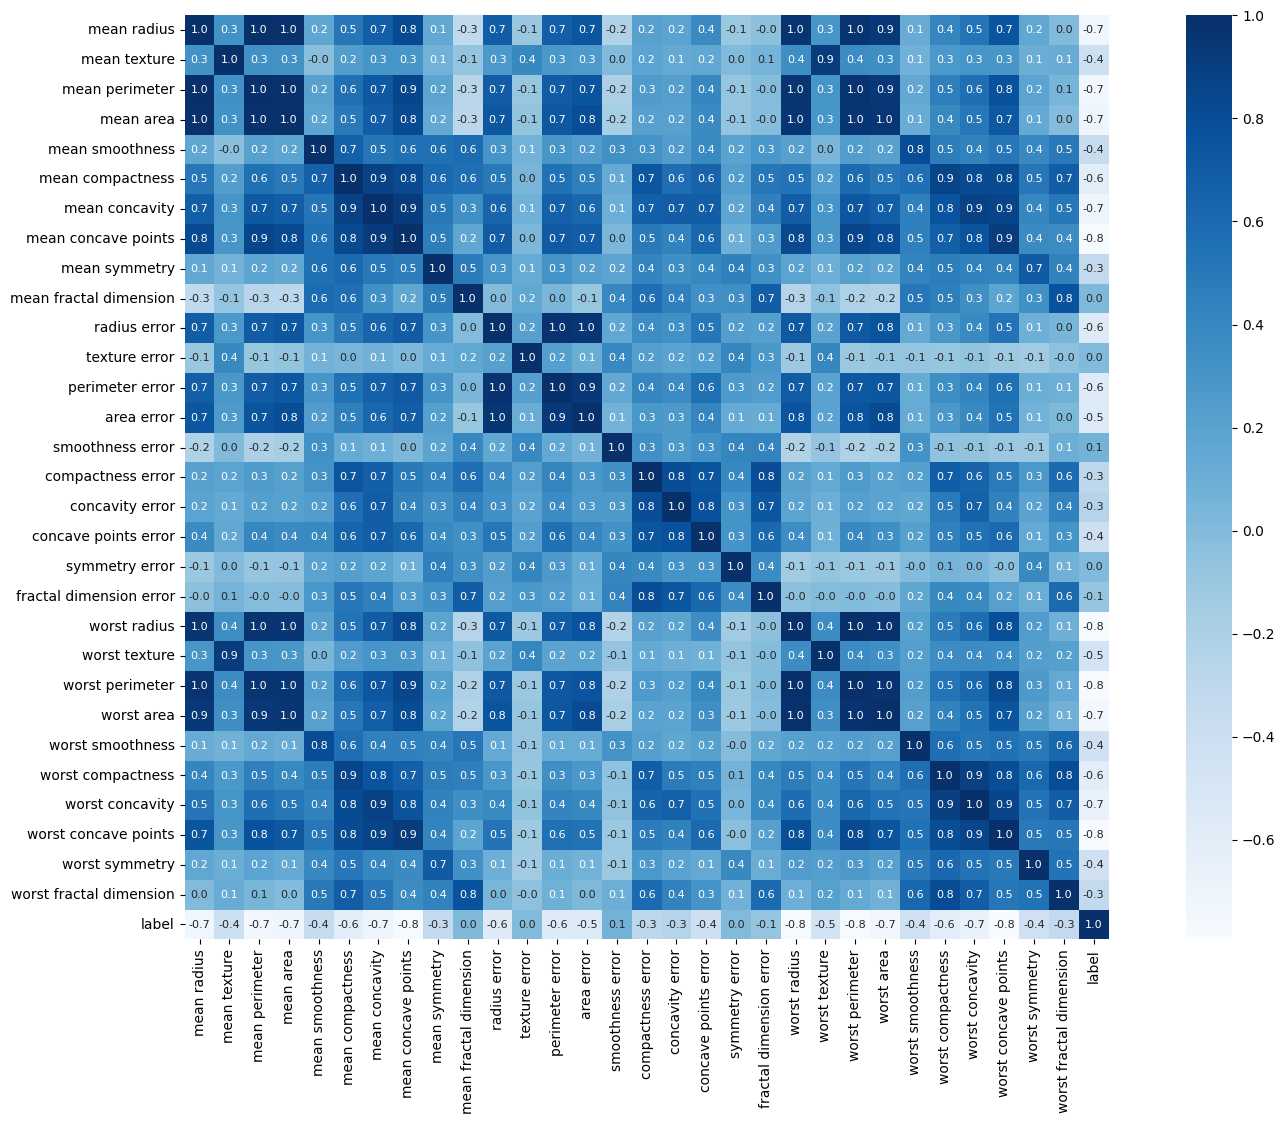

In [9]:
#Analyzing correlation with heatmap

correlation = data.corr()

plt.figure(figsize=(20,12))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8},cmap='Blues')

# **most of the features are negatively correlated to the target variable "label"**

In [10]:
#Separating features and target

X = data.drop(columns='label',axis=1)

y = data['label']

In [11]:
#Splitting the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [12]:
 #Standardizing features

 scaler = StandardScaler()

 X_train_scaled = scaler.fit_transform(X_train)
 X_test_scaled = scaler.fit_transform(X_test)

# **Building the Neural Network Model**

In [13]:
#Setting number of seeds

tf.random.set_seed(3)

In [14]:
#Define neural network architecture

model = Sequential([
    Flatten (input_shape=(30,)),
    Dense(20, activation='relu'),
    Dense(2,activation='sigmoid')
])

In [15]:
#Compiling the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
#Training the neural network model

history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 26ms/step - loss: 0.6888 - accuracy: 0.5672 - val_loss: 0.5284 - val_accuracy: 0.7391
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.4314 - accuracy: 0.8264 - val_loss: 0.3190 - val_accuracy: 0.9348
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.3044 - accuracy: 0.9046 - val_loss: 0.2240 - val_accuracy: 0.9565
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2401 - accuracy: 0.9291 - val_loss: 0.1775 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1998 - accuracy: 0.9413 - val_loss: 0.1529 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 7ms/step - loss: 0.1755 - accuracy: 0.9535 - val_loss: 0.1371 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1577 - accuracy: 0.9560 - val_loss: 0.1251 - val_accuracy: 0.9783
Epoch 8/10
13/13 [=

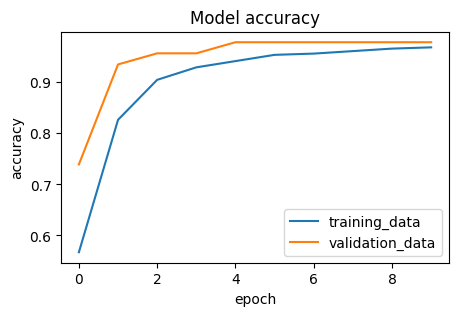

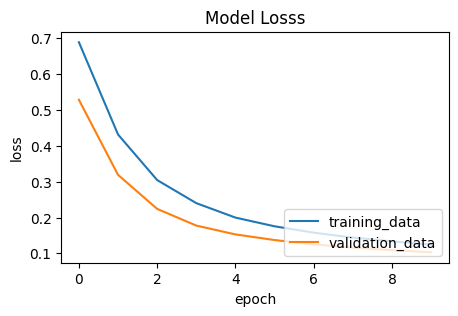

In [17]:
#Visualizing accuracy and loss

plt.figure(figsize=(5,3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training_data','validation_data'],loc='lower right')
plt.show()

plt.figure(figsize=(5,3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Losss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_data','validation_data'],loc='lower right')
plt.show()

In [18]:
#Accuracy of test data

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(accuracy)

4/4 [==============================] - 0s 5ms/step - loss: 0.1048 - accuracy: 0.9737
0.9736841917037964


In [19]:
#make prediction

y_pred = model.predict(X_test_scaled)

y_pred

4/4 [==============================] - 0s 3ms/step


array([[0.33193702, 0.83083284],
       [0.45125303, 0.6351521 ],
       [0.12017157, 0.9240549 ],
       [0.9996798 , 0.08299691],
       [0.44819403, 0.6920115 ],
       [0.9742309 , 0.22585903],
       [0.31968933, 0.8189274 ],
       [0.12447167, 0.94048154],
       [0.16243336, 0.8491607 ],
       [0.18291202, 0.8912004 ],
       [0.57895905, 0.5696052 ],
       [0.45289746, 0.8044003 ],
       [0.1994339 , 0.8862395 ],
       [0.22334224, 0.7862752 ],
       [0.19223607, 0.91222996],
       [0.73908275, 0.24425344],
       [0.10762894, 0.8991884 ],
       [0.14342599, 0.94438344],
       [0.08795617, 0.794148  ],
       [0.9921783 , 0.61302227],
       [0.17037617, 0.8123165 ],
       [0.06639145, 0.8738869 ],
       [0.08225128, 0.8337119 ],
       [0.13903984, 0.970489  ],
       [0.33749327, 0.9415347 ],
       [0.89729565, 0.26522008],
       [0.24669008, 0.7622808 ],
       [0.27142936, 0.84004045],
       [0.8333291 , 0.27772948],
       [0.8790473 , 0.19673584],
       [0.

In [20]:
#Converting the prediction to class labels

y_pred_labels = [np.argmax(i) for i in y_pred]

print(y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]


# **Creating the prediction system using sample input**

In [21]:
sample_input = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

#Change the input to a numpy array
input_array = np.asarray(sample_input)

#Reshape the numpy array as we are predicting one data point
input_reshaped = input_array.reshape(1,-1)

#Standardize the input_reshaped data
input_std = scaler.fit_transform(input_reshaped)

#Prediction
prediction = model.predict(input_std)
print(prediction)

prediction_label = np.argmax(prediction)
print(prediction_label)

if prediction_label == 0:
  print("The tumor is Malignant!")
else:
  print("The tumor is Benign!")

1/1 [==============================] - 0s 23ms/step
[[0.48553276 0.5351026 ]]
1
The tumor is Benign!
